<a href="https://colab.research.google.com/github/DavidJeonKr/lab_python/blob/master/py24_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 미국 신생아 이름 데이터 셋

* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets
* 1880 ~ 2010 연도별로 파일이 나눠져 있음.
* 각 파일에는 이름, 성별, 신생아 (수)가 comma로 구분되어 있다

In [4]:
file_1880 = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob1880.txt'

In [5]:
yob1880 = pd.read_csv(file_1880)

In [6]:
yob1880.head(1)

,Mary,F,7065
0,Anna,F,2604


`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터 프레임이 컬럼이름으로 간주.

파일에 컬럼 이름이 포함되어 있지 않은 경우(파일의 첫번째 줄부터 데이터가 시작하는 경우)에는 컬럼이름을들을 파라미터에 전달해야만 한다.

In [8]:
col_names = ['name','gender','births']

In [10]:
yob1880 = pd.read_csv(file_1880, names=col_names)

In [11]:
yob1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [14]:
yobs = [] # 각 연도의 데이터 프레임을 append할 빈 리스트.
for year in range(1880, 2011): # 1880년 부터 2010년 까지 연도를 반복하면서
    # txt 파일이 저장된 파일경로
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt'
    # 해당 연도의 txt 파일을 읽어서 DataFram 생성
    df = pd.read_csv(file_path, names=col_names)
    # 생성된 DataFrame에 year 컬럼을 추가
    df['year'] = year
    # 해당 연도의 DataFrame을 리스트에 추가
    yobs.append(df)

In [15]:
# yobs 리스트의 아이템의 개수
len(yobs)

131

In [18]:
yobs[0]

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [19]:
yobs[-1]

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [22]:
# 131개의 DataFrame을 길게 이어붙임(concatenate)
df = pd.concat(yobs, ignore_index=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [24]:
df.loc[0]

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

In [26]:
#연도별 신생아 숫자
births_by_year = df.groupby(by='year')['births'].sum()
births_by_year

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

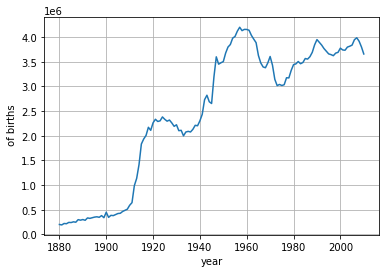

In [29]:
plt.plot(births_by_year.index, births_by_year.values) 
plt.xlabel('year')
plt.ylabel(' of births')
plt.grid()
plt.show()

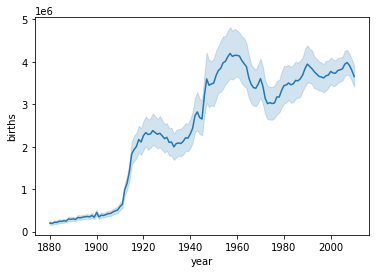

In [31]:
sns.lineplot(x='year', y='births', data=df, estimator=np.sum)
plt.show()


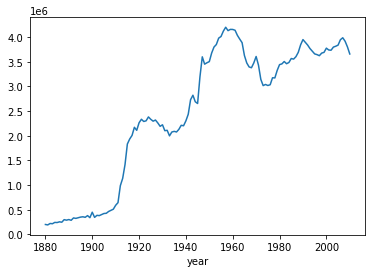

In [32]:
sns.lineplot(x=births_by_year.index, y=births_by_year.values)

In [33]:
#연도별 성별 신생아 수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [57]:
year_by_gender = df.groupby(by='year')['gender']

In [62]:
by_year_gender = df.groupby(by=['year', 'gender'])['births'].sum()
by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [63]:
type(by_year_gender)

pandas.core.series.Series

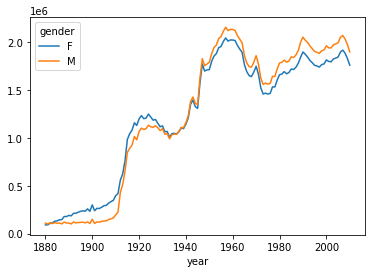

In [65]:
sns.lineplot(data=by_year_gender, x='year', y=by_year_gender.values, hue='gender')
plt.show()

In [67]:
df_by_year_gender = by_year_gender.reset_index()
df_by_year_gender

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


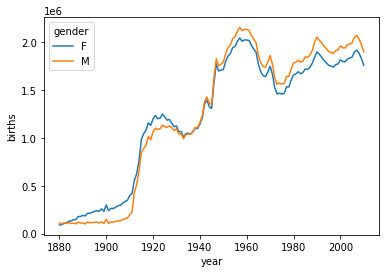

In [68]:
sns.lineplot(x='year', y='births', data=df_by_year_gender, hue='gender')